In [1]:
# Smart_grid.py
# Antonio, Mec, Vincent
# YakuzAI

from code.smart_grid import load_battery_data, load_house_data, show_district
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from code.battery import Battery
from code.house import House

District one first 20 houses and 5 batteries

In [2]:
from itertools import islice


def first_n_items_of_dict(input_dict, n):
    return dict(islice(input_dict.items(), n))

batteries = load_battery_data('Huizen&Batterijen/district_1/district-1_batteries.csv')
houses = load_house_data('Huizen&Batterijen/district_1/district-1_houses.csv')

# Get the first 5 elements of batteries and the first 10 elements of houses
first_five_batteries = first_n_items_of_dict(batteries, 5)
first_20_houses = first_n_items_of_dict(houses, 20)

print(first_five_batteries)
print(first_20_houses)

{(38, 12): 1507.0, (43, 13): 1507.0, (42, 3): 1507.0, (49, 23): 1507.0, (3, 45): 1507.0}
{(34, 47): 53.97543253, (24, 22): 66.13020717, (49, 44): 39.82123377, (19, 38): 46.4333204, (22, 46): 62.43058175, (17, 11): 62.14055349, (19, 4): 52.43116675, (8, 6): 30.48448777, (9, 37): 63.19785578, (16, 38): 65.00367928, (20, 11): 40.20336825, (19, 12): 53.03976583, (33, 0): 39.13247939, (33, 7): 39.45690812, (21, 37): 53.84443114, (37, 28): 60.40913294, (2, 8): 27.78076375, (23, 48): 57.77286486, (28, 23): 38.72179636, (27, 22): 29.92408755}


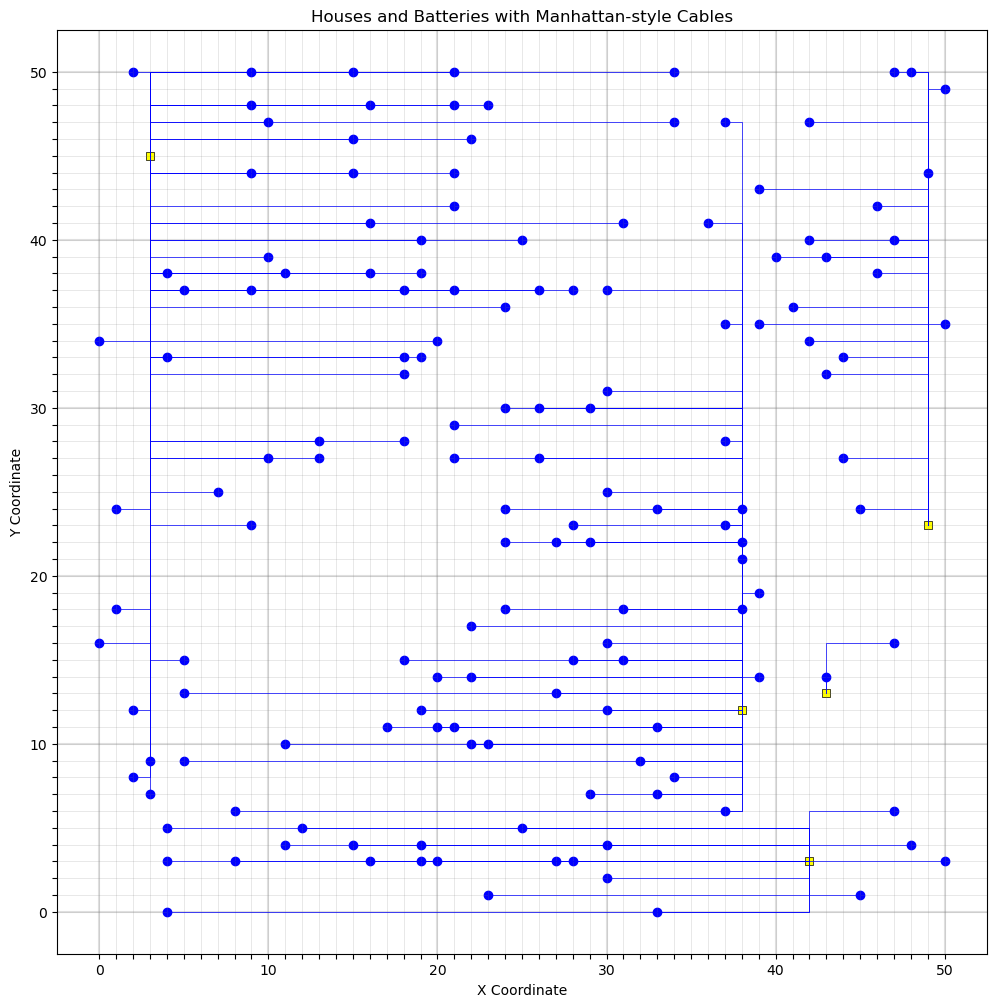

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have dictionaries 'houses' and 'batteries' containing positions

# Create a larger figure with a 15x15-inch size
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xticks(np.arange(0, 51, 1))
ax.set_yticks(np.arange(0, 51, 1))

# The lines are opaque and grey
ax.grid(linestyle='-', linewidth='0.5', alpha=0.25, color='grey', zorder=0)

# Every 10th line is bold
for i in range(0, 51, 10):
    ax.axvline(x=i, color='grey', linestyle='-', linewidth=1.5, alpha=0.25, zorder=0)
    ax.axhline(y=i, color='grey', linestyle='-', linewidth=1.5, alpha=0.25, zorder=0)

# Only index every 10th line
ax.set_xticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])
ax.set_yticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])

# Plot the houses and batteries
for house_position in houses.keys():
    plt.scatter(*house_position, color='blue', label='House')

    # Find the nearest battery for each house
    nearest_battery = min(batteries.keys(), key=lambda x: abs(x[0] - house_position[0]) + abs(x[1] - house_position[1]))

    # Connect each house to its nearest battery (horizontally and vertically)
    plt.plot([house_position[0], nearest_battery[0], nearest_battery[0]], [house_position[1], house_position[1], nearest_battery[1]], 'b-', linewidth=0.5)

for battery_position in batteries.keys():
    plt.scatter(*battery_position, color='yellow', edgecolors='black', linewidth=0.5, marker='s', label='Battery')


plt.title('Houses and Batteries with Manhattan-style Cables')

plt.show()
